<a href="https://colab.research.google.com/github/kiseijuuzzz/Python_Quest/blob/main/Exploration_CR4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1. 데이터셋 내려받기

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.applications import MobileNet

# Load TF Flowers dataset
(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True
)

## Step 2. 데이터셋을 모델에 넣을 수 있는 형태로 준비하기

In [2]:
IMG_SIZE = 160
num_classes = metadata.features['label'].num_classes

# Preprocess the datasets
def format_example(image, label):
    image = tf.cast(image, tf.float32)
    image = image/255
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

train_batches = train.shuffle(1000).batch(32)
validation_batches = validation.batch(32)
test_batches = test.batch(32)

## Step 3. 모델 설계하기

In [3]:
# Load MobileNet model without top layer and freeze weights
base_model = MobileNet(input_shape=(IMG_SIZE, IMG_SIZE, 3),
                       include_top=False,
                       weights='imagenet')
base_model.trainable = False

# Create model architecture
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

## Step 4. 모델 학습시키기

In [4]:
# Train the model
history = model.fit(train_batches,
                    validation_data=validation_batches,
                    epochs=10)

Epoch 1/10
92/92 [==============================] - 92s 861ms/step - loss: 0.5161 - accuracy: 0.8157 - val_loss: 0.3407 - val_accuracy: 0.8856
Epoch 2/10
92/92 [==============================] - 72s 776ms/step - loss: 0.2246 - accuracy: 0.9210 - val_loss: 0.3342 - val_accuracy: 0.8856
Epoch 3/10
92/92 [==============================] - 77s 835ms/step - loss: 0.1168 - accuracy: 0.9653 - val_loss: 0.3145 - val_accuracy: 0.8992
Epoch 4/10
92/92 [==============================] - 76s 827ms/step - loss: 0.0658 - accuracy: 0.9877 - val_loss: 0.3164 - val_accuracy: 0.8937
Epoch 5/10
92/92 [==============================] - 69s 738ms/step - loss: 0.0353 - accuracy: 0.9963 - val_loss: 0.3090 - val_accuracy: 0.9046
Epoch 6/10
92/92 [==============================] - 64s 688ms/step - loss: 0.0208 - accuracy: 0.9986 - val_loss: 0.3015 - val_accuracy: 0.9155
Epoch 7/10
92/92 [==============================] - 65s 697ms/step - loss: 0.0137 - accuracy: 0.9993 - val_loss: 0.3161 - val_accuracy: 0.9046

## Step 5. 모델 성능 평가하기

12/12 [==============================] - 10s 791ms/step - loss: 0.2884 - accuracy: 0.9237
Test Loss: 0.2884470820426941
Test Accuracy: 0.9237056970596313


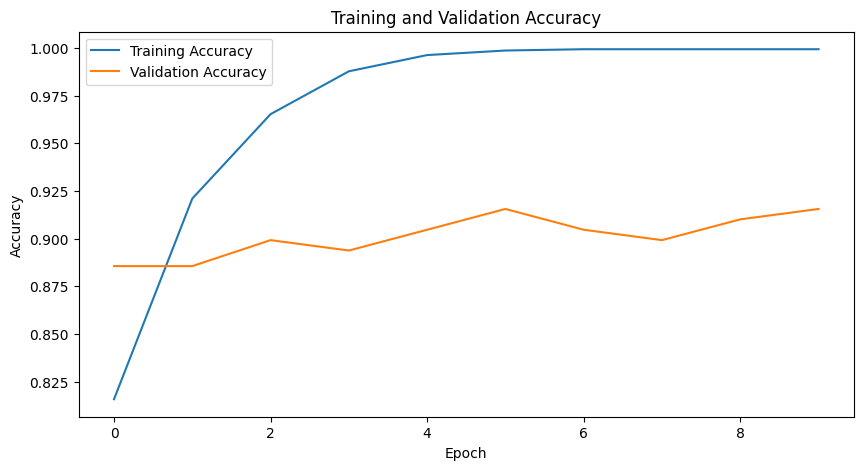

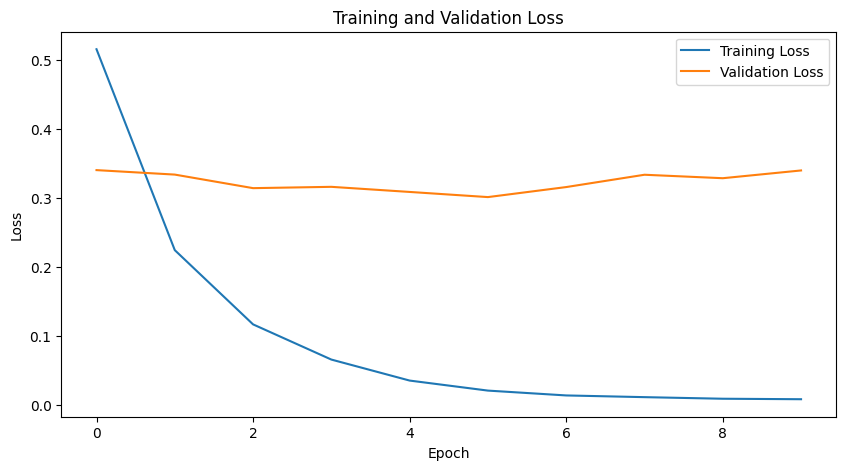

In [5]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_batches)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

import matplotlib.pyplot as plt

# Get training and validation accuracy
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Get training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Step 6. 모델 활용하기

1/1 [==============================] - 0s 68ms/step
This image seems to be roses with a confidence of 100.00%.


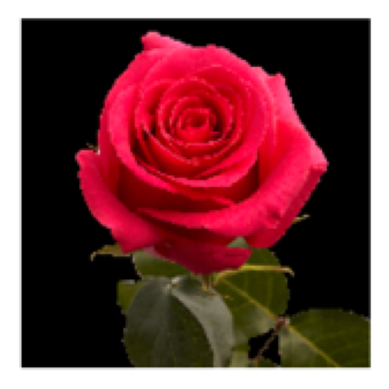

In [29]:
import os
from PIL import Image
import matplotlib.pyplot as plt

img_dir_path = "/content/images"
os.path.exists(img_dir_path)

def show_and_predict_image(dirpath, filename, img_size=160):
    filepath = os.path.join(dirpath, filename)
    image = Image.open(filepath)

    # Convert image to RGB if it has an alpha channel (RGBA)
    if image.mode == 'RGBA':
        image = image.convert('RGB')

    image = image.resize((img_size, img_size))
    plt.imshow(image)
    plt.axis('off')
    image = np.array(image) / 255.0
    image = tf.expand_dims(image, 0)
    predictions = model.predict(image)
    prediction_idx = np.argmax(predictions[0])
    flower_lists = metadata.features['label'].names
    confidence = np.max(predictions) * 100
    print(f"This image seems to be {flower_lists[prediction_idx]} with a confidence of {confidence:.2f}%.")

filename = '2.png'
show_and_predict_image(img_dir_path, filename)